In [2]:
#install pygsp
! pip install pygsp

In [0]:
#import library
import numpy as np
from pygsp import graphs, reduction ,filters
import matplotlib
import matplotlib.pyplot as plt
import pygsp
plt.style.use('ggplot')


In [0]:
# Return MSE Error
def mser(A, B):
  mse = ((A - B)**2).mean()
  return mse

In [0]:
# create filter
g = [lambda x: 5./(5 + x)]

# Part A


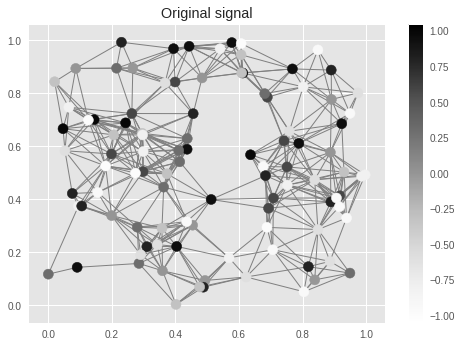

In [10]:

# Create a graph with 100 Sensors
N = 100 # number of nodes
G = pygsp.graphs.Sensor(N)
G.compute_fourier_basis()

# signal with bandwidth 20
x = np.sin((np.arange(100) * 2*np.pi/20))

G.plot_signal(x, plot_name='Original signal')

# Part B


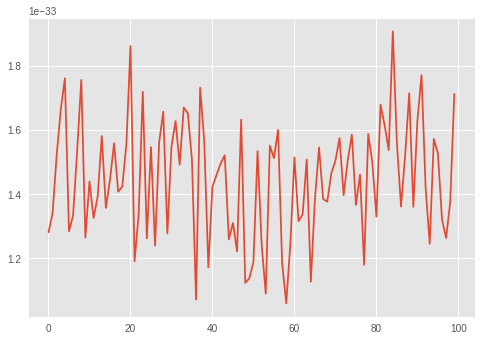

In [8]:


# downsampling to 20 nodes

from scipy import sparse, stats
import random

mselst = []
signal = np.sin((np.arange(100) * 2*np.pi/20))

for i in range(100):
  ind = random.sample(range(N), 20)
  sparsify_eps = min(10. / np.sqrt(G.N), 0.3)
  G.estimate_lmax()
  reg_eps=0.005
  Gs = [G]
  Gs[0].mr = {'idx': np.arange(G.N), 'orig_idx': np.arange(G.N)}

  Gs.append( pygsp.reduction.kron_reduction(Gs[0], ind))

  Gs[1].estimate_lmax()
  Gs[1].mr = {'idx': ind, 'orig_idx': Gs[0].mr['orig_idx'][ind]}
  L_reg = Gs[0].L + reg_eps * sparse.eye(Gs[0].N)
  Gs[0].mr['K_reg'] = pygsp.reduction.kron_reduction(L_reg, ind)
  Gs[0].mr['green_kernel'] = filters.Filter(Gs[0], lambda x: 1./(reg_eps + x))
  Gs[1].compute_fourier_basis()
  ca, pe = reduction.pyramid_analysis(Gs, signal, h_filters=g, method='exact')
  s_pred, _ = reduction.pyramid_synthesis(Gs, ca[1], pe, method='exact')
  mselst.append(mser(s_pred,signal))
  
  
# plot MSE of 100 iteration randomly select 20 nodes
plt.plot(mselst)

#Part C


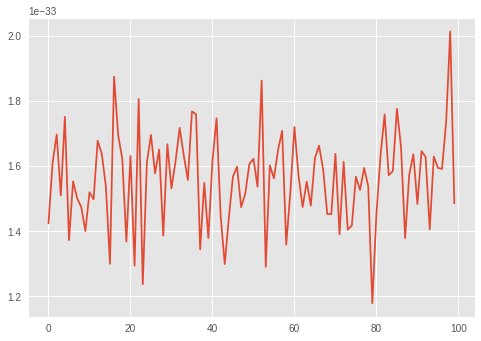

In [9]:


# downsampling to 40 nodes

from scipy import sparse, stats
import random

mselst = []
signal = np.sin((np.arange(100) * 2*np.pi/20))

for i in range(100):
  ind = random.sample(range(N), 40)
  sparsify_eps = min(10. / np.sqrt(G.N), 0.3)
  G.estimate_lmax()
  reg_eps=0.005
  Gs = [G]
  Gs[0].mr = {'idx': np.arange(G.N), 'orig_idx': np.arange(G.N)}

  Gs.append( pygsp.reduction.kron_reduction(Gs[0], ind))

  Gs[1].estimate_lmax()
  Gs[1].mr = {'idx': ind, 'orig_idx': Gs[0].mr['orig_idx'][ind]}
  L_reg = Gs[0].L + reg_eps * sparse.eye(Gs[0].N)
  Gs[0].mr['K_reg'] = pygsp.reduction.kron_reduction(L_reg, ind)
  Gs[0].mr['green_kernel'] = filters.Filter(Gs[0], lambda x: 1./(reg_eps + x))
  Gs[1].compute_fourier_basis()
  ca, pe = reduction.pyramid_analysis(Gs, signal, h_filters=g, method='exact')
  s_pred, _ = reduction.pyramid_synthesis(Gs, ca[1], pe, method='exact')
  mselst.append(mser(s_pred,signal))
  
# plot MSE of 100 iteration randomly select 40 nodes
plt.plot(mselst)

# Part D

MSE for noise 1 is 1.4986394016659685
MSE for noise 0.1 is 1.5770222470941564


/usr/local/lib/python3.6/dist-packages/pygsp/filters/expwin.py:39: RuntimeWarning: overflow encountered in exp
  y = np.exp(-float(a)/x)


MSE for noise 0.01 is 1.5791151002927806
MSE for noise 0.001 is 1.5795985280323441


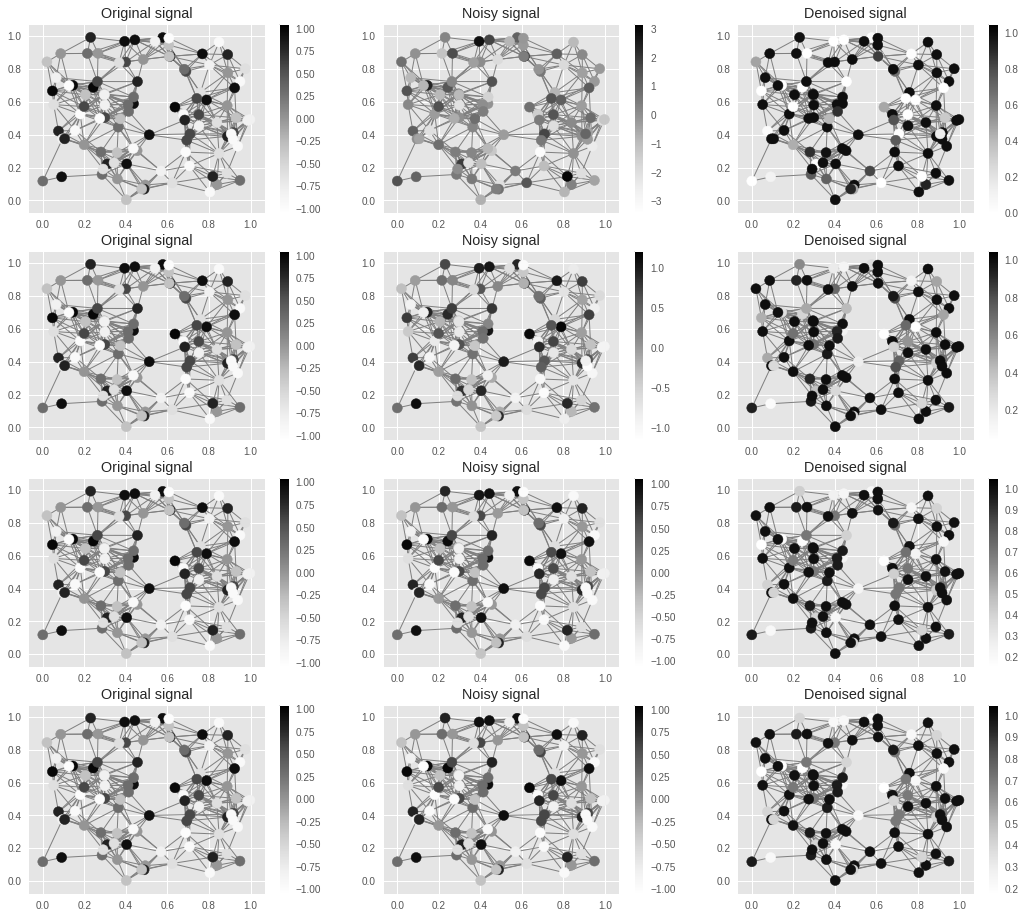

In [12]:
# add noise width different sigma

fig = plt.figure(figsize=(18, 16))
j = 0
mselist = []
idxlist = []
for i in range(4):
  noise = np.random.normal(0, 10 ** -i, size=N)
  y = x + noise #np.random.normal(scale=1/np.sqrt(N), size=N)
  filter = pygsp.filters.Expwin(G, 0.1)
  s = filter.evaluate(y)
  msee = mser(x,s)
  mselist.append(msee)
  idxlist.append(i)
  print('MSE for noise {0} is {1}'.format((10 ** -i),str(msee)))
  j = j+1
  ax = fig.add_subplot(4, 3, j)
  G.plot_signal(x, plot_name='Original signal',ax=ax)
  j = j+1
  ax = fig.add_subplot(4, 3, j)
  G.plot_signal(y, plot_name='Noisy signal',ax=ax)
  j = j+1
  ax = fig.add_subplot(4, 3, j)
  G.plot_signal(s, plot_name='Denoised signal',ax=ax)
  
  


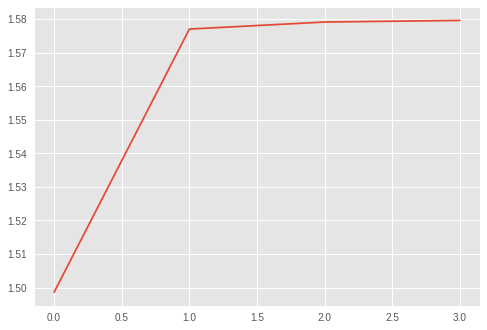

In [13]:
# plot MSE for different sigma
plt.plot(mselist)